importing the dependencies

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

data collection and processing

In [6]:
import pandas as pd
# loading the data from csv file to pands dataframe
car_dataset = pd.read_csv('/CAR DETAILS.csv')
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [51]:
#checking the number of rows and cloumns
car_dataset.shape

(4340, 8)

In [52]:
#getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   int64 
 7   owner          4340 non-null   object
dtypes: int64(4), object(4)
memory usage: 271.4+ KB


In [ ]:
#checking the number of missing value
car_dataset.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [ ]:
# checking the distribution of categorical data
print(car_dataset.fuel.value_counts())
print(car_dataset.seller_type.value_counts())
print(car_dataset.transmission.value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64


In [8]:
import pandas as pd
car_dataset = pd.read_csv('/CAR DETAILS.csv')
#encoding "fuel_type" column
car_dataset.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

#encoding "seller_type" column
car_dataset.replace({'seller_type':{'Dealer':0,'Individual':1}},inplace=True)

#encoding "transmission" column
car_dataset.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)

car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,1,0,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,1,0,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,0,First Owner
3,Datsun RediGO T Option,2017,250000,46000,0,1,0,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,0,Second Owner


splitting the data and target

In [37]:
x = car_dataset.drop(['name','selling_price','seller_type','owner'],axis=1)
y = car_dataset['selling_price']

print(x)

print(y)


      year  km_driven fuel  transmission
0     2007      70000    0             0
1     2007      50000    0             0
2     2012     100000    1             0
3     2017      46000    0             0
4     2014     141000    1             0
...    ...        ...  ...           ...
4335  2014      80000    1             0
4336  2014      80000    1             0
4337  2009      83000    0             0
4338  2016      90000    1             0
4339  2016      40000    0             0

[4340 rows x 4 columns]
0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


splitting training and test data

In [29]:
x = pd.get_dummies(x, columns=['fuel'])
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=2)


Model training

  1.linear regression

In [38]:
# loading the linear regression model
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

model evalution

In [39]:
#prediction on training data
training_data_prediction = lin_reg_model.predict(x_train)

In [40]:
# r squared error
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.4441828338984941


visualize the actual prices and predicate prices

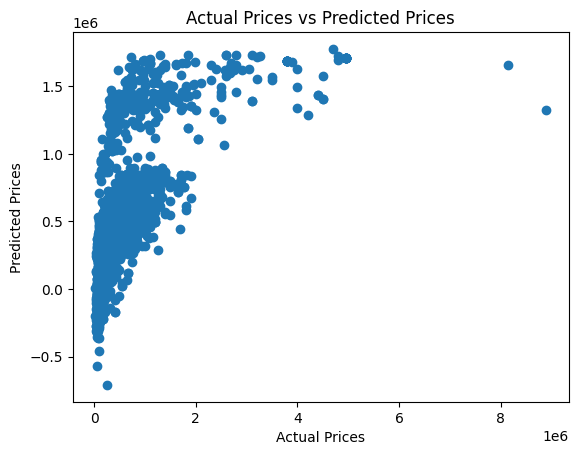

In [41]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [42]:
#prediction on training data
test_data_prediction = lin_reg_model.predict(x_test)

In [43]:
# r squared error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.5205696938505817


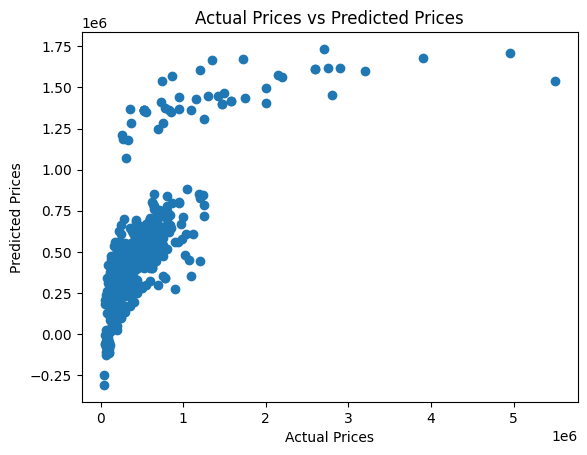

In [45]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

lasso regression

In [46]:
# loading the lasso regression
lass_reg_model = Lasso()
lass_reg_model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.247e+13, tolerance: 1.306e+11
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [47]:
training_data_prediction = lass_reg_model.predict(x_train)
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared Error : ", error_score)


R squared Error :  0.44418282122148156


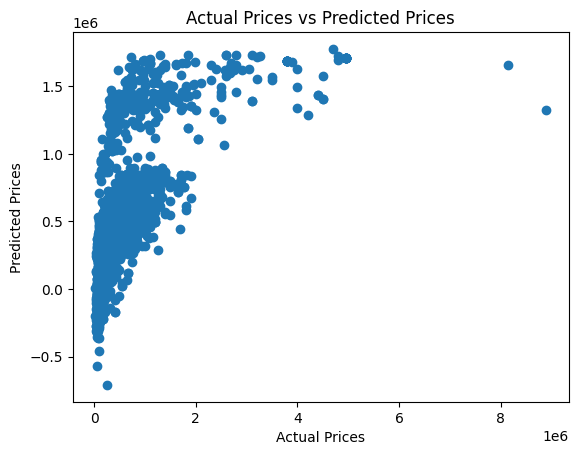

In [48]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [49]:
test_data_prediction = lass_reg_model.predict(x_test)
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.5205689279518495


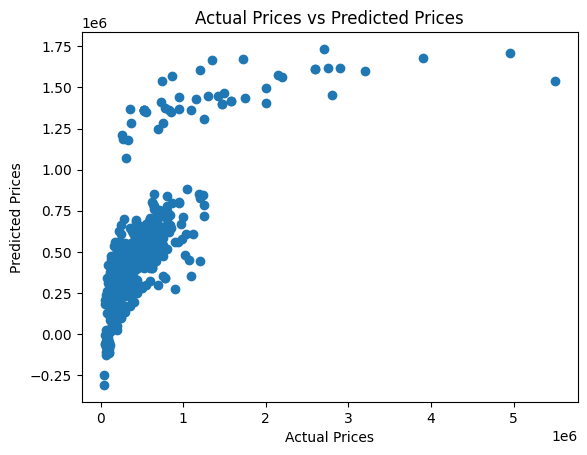

In [50]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()